# Problem Statement and Data Description


**Chennai House Price Prediction (Regression)**

ChennaiEstate is a real estate firm based in Chennai that is involved in the property business for the past 5 years. Since, they are in the business for so long, they have enough data of all the real estate transactions in the city.

They decided to venture into Analytics and have now started a division called “Chennai Estate Analytics” to give consumers as much information as possible about housings and the real estate market in Chennai. A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring real-estate owners have a
trusted way to monitor the asset is incredibly important. Hence, they have hired you as a consultant to help them give insights and develop a model to accurately predict real estate prices.

Based on the train dataset, you will need to develop a model that accurately predicts the real estate price in Chennai.

### Data Description

  
## House Features
   - INT_SQFT – The interior Sq. Ft of the property
   - N_BEDROOM – The number of Bed rooms
   - N_BATHROOM - The number of bathrooms
   - N_ROOM – Total Number of Rooms
   - QS_ROOMS – The quality score assigned for rooms based on buyer reviews
   - QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
   - QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
   - QS_OVERALL – The Overall quality score assigned for the property
   - SALE_COND – The Sale Condition
       - Normal: Normal Sale
       - Abnorml: Abnormal Sale - trade, foreclosure, short sale
       - AdjLand: Adjoining Land Purchase
       - Family: Sale between family members
       - Partial: Home was not completed when last assessed
   - BUILDTYPE – The type of building
        - House
        - Commercial
        - Others



## Surrounding and Locality
   - AREA – The property in which the real estate is located
   - DIST_MAINROAD – The distance of the property to the main road
   - PARK_FACIL – Whether parking facility is available
   - UTILITY_AVAIL
        - AllPub: All public Utilities (E,G,W,& S)
        - NoSewr: Electricity, Gas, and Water (Septic Tank)
        - NoSeWa: Electricity and Gas Only
        - ELO: Electricity only
   - STREET
        - Gravel
        - Paved
        - No Access
   - MZZONE
        - A: Agriculture
        - C: Commercial
        - I: Industrial
        - RH: Residential High Density
        - RL: Residential Low Density
        - RM: Residential Medium Density
        

## House Sale Price
   - PRT_ID – The Property Transaction ID assigned by ChennaiEstate
   - COMMIS – The Commission paid to the agent
   - SALES_PRICE – The total sale price of the property


# Loading the Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import os

In [4]:
# Changing directory for data file
os.getcwd()
os.chdir("F:\Read_data")

In [5]:
data = pd.read_csv("chennai_house_price_prediction.csv")

In [6]:
data.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [18]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [19]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [9]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


In [62]:
data.count

<bound method DataFrame.count of       PRT_ID        AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0     P03210  Karapakkam      1004            131        1.0         1.0   
1     P09411  Anna Nagar      1986             26        2.0         1.0   
2     P01812       Adyar       909             70        1.0         1.0   
3     P05346   Velachery      1855             14        3.0         2.0   
4     P06210  Karapakkam      1226             84        1.0         1.0   
...      ...         ...       ...            ...        ...         ...   
7104  P03834  Karapakkam       598             51        1.0         1.0   
7105  P10000   Velachery      1897             52        3.0         2.0   
7106  P09594   Velachery      1614            152        2.0         1.0   
7107  P06508  Karapakkam       787             40        1.0         1.0   
7108  P09794   Velachery      1896            156        3.0         2.0   

      N_ROOM    SALE_COND PARK_FACIL   BUILDTYPE UTILI

In [10]:
data.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
INT_SQFT,1.000000,0.002022,0.786348,0.515390,0.951279,0.019850,-0.008337,0.008865,0.014025,0.571076,0.612125
DIST_MAINROAD,0.002022,1.000000,-0.002566,0.001970,0.002301,0.002237,-0.029468,0.001554,-0.017313,0.010994,0.018783
N_BEDROOM,0.786348,-0.002566,1.000000,0.755214,0.840286,0.015112,-0.007635,0.015569,0.014209,0.430424,0.330999
N_BATHROOM,0.515390,0.001970,0.755214,1.000000,0.568688,0.013112,-0.012057,0.013196,0.007907,0.256533,0.108884
N_ROOM,0.951279,0.002301,0.840286,0.568688,1.000000,0.016524,-0.007545,0.015072,0.015459,0.533343,0.602760
QS_ROOMS,0.019850,0.002237,0.015112,0.013112,0.016524,1.000000,0.008828,0.007789,0.517741,0.009377,0.021967
QS_BATHROOM,-0.008337,-0.029468,-0.007635,-0.012057,-0.007545,0.008828,1.000000,-0.011745,0.551125,-0.000471,-0.011377
QS_BEDROOM,0.008865,0.001554,0.015569,0.013196,0.015072,0.007789,-0.011745,1.000000,0.630447,0.020118,0.018804
QS_OVERALL,0.014025,-0.017313,0.014209,0.007907,0.015459,0.517741,0.551125,0.630447,1.000000,0.017004,0.020556
COMMIS,0.571076,0.010994,0.430424,0.256533,0.533343,0.009377,-0.000471,0.020118,0.017004,1.000000,0.626275


In [24]:
x= data.pivot_table(values="N_BATHROOM",index="N_BEDROOM",aggfunc= np.mean)
x

,N_BATHROOM
N_BEDROOM,
1.0,1.000000
2.0,1.235644
3.0,2.000000
4.0,2.000000


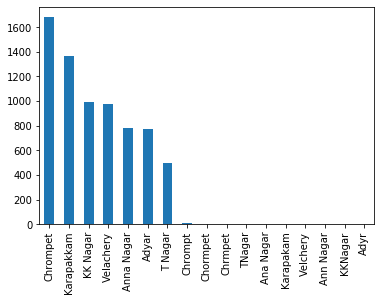

In [16]:
data['AREA'].value_counts().plot.bar()

In [56]:
x={"Chrompt":"Chrompet","Chormpet":"Chrompet","Chrmpet":"Chrompet","TNagar":"T Nagar","Ann Nagar":"Anna Nagar",\
   "Adyr":"Adyar","KKNagar":"KK Nagar","Velchery":"Velachery","Karapakam":"Karapakkam","Ana Nagar":"Anna Nagar"}
data['AREA'].replace(x, inplace=True)

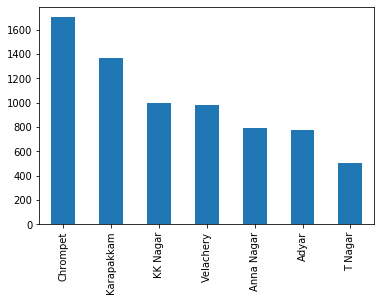

In [57]:
data['AREA'].value_counts().plot.bar()

In [61]:
data["AREA"].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64